In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

In [2]:
# Read data from "train.csv" file into a DataFrame called train_data and display the first few rows
train_data = pd.read_csv("train.csv")
print(train_data.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [3]:
# Displaying the data types of each column in the train_data DataFrame
print(train_data.dtypes)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [4]:
# Check for missing values in each column of the dataframe
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
# Storing descriptive statistics of the training data in a DataFrame called df
df = train_data.describe()
df

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
# Replacing categorical values in 'Sex' and 'Embarked' columns with numerical equivalents
train_data.replace({'Sex':{'male':0,'female':1}, 'Embarked':{'S':0,'C':1,'Q':2}}, inplace=True)

# Filling null values in the 'Age' column with the mean age
train_data['Age'].fillna(train_data['Age'].mean(), inplace=True)


# Filling null values in the 'Embarked' column with the mode
print(train_data['Embarked'].mode())
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)


# Displaying the first few rows of the modified DataFrame
train_data.head()

0    0.0
Name: Embarked, dtype: float64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,1.0
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,0.0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,0.0


In [7]:
# Drop non-numeric columns before calculating correlation coefficients
#numeric_train_data = train_data.select_dtypes(include=['int64', 'float64'])

# Calculating the correlational coefficients
train9 = train_data.describe()
correlation_matrix = train9.corr()

# Displaying the correlational coefficients
print(correlation_matrix)

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000  0.521032  0.522038  0.521033  0.579152  0.525557   
Survived        0.521032  1.000000  0.999997  1.000000  0.997188  0.999971   
Pclass          0.522038  0.999997  1.000000  0.999997  0.997271  0.999969   
Sex             0.521033  1.000000  0.999997  1.000000  0.997188  0.999971   
Age             0.579152  0.997188  0.997271  0.997188  1.000000  0.997658   
SibSp           0.525557  0.999971  0.999969  0.999971  0.997658  1.000000   
Parch           0.523936  0.999983  0.999981  0.999983  0.997524  0.999998   
Fare            0.768955  0.854290  0.854411  0.854293  0.886592  0.858250   
Embarked        0.521664  0.999999  0.999996  0.999999  0.997257  0.999978   

                Parch      Fare  Embarked  
PassengerId  0.523936  0.768955  0.521664  
Survived     0.999983  0.854290  0.999999  
Pclass       0.999981  0.854411  0.999996  
Sex          0.999983  0.854293  0.999999  

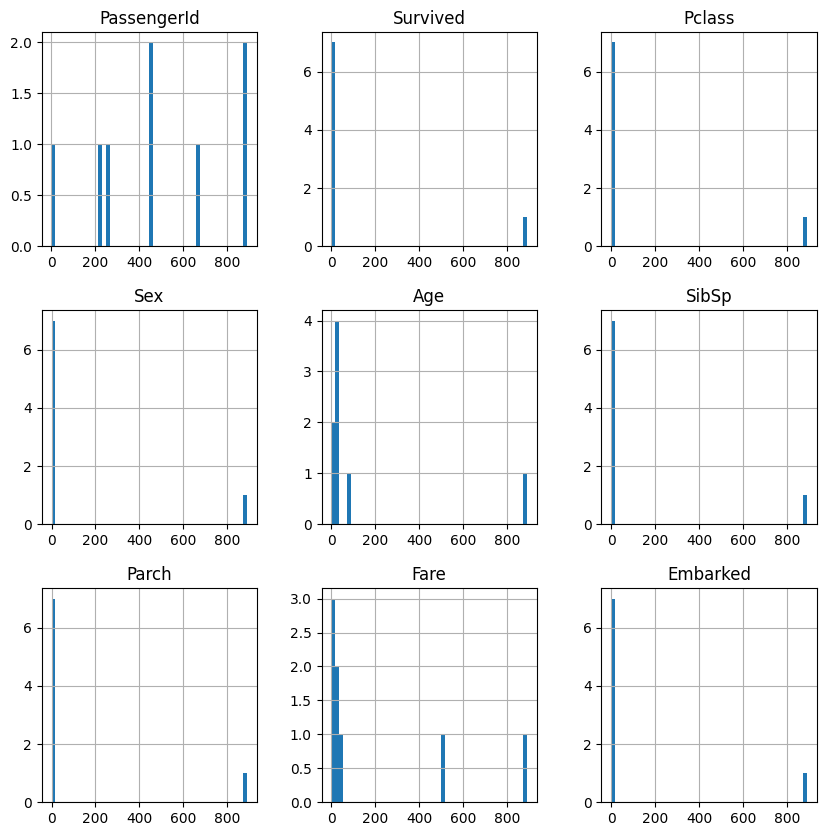

In [8]:
# Setting up inline plotting for matplotlib
%matplotlib inline

# Importing matplotlib
import matplotlib.pyplot as plt

# Storing descriptive statistics of the modified training data in a DataFrame called df
df = train_data.describe()

# Plotting histograms for each numerical attribute with 50 bins and a figure size of 10x10
df.hist(bins=50, figsize=(10, 10))

# Displaying the plots
plt.show()

array([[<Axes: xlabel='PassengerId', ylabel='PassengerId'>,
        <Axes: xlabel='Survived', ylabel='PassengerId'>,
        <Axes: xlabel='Pclass', ylabel='PassengerId'>,
        <Axes: xlabel='Sex', ylabel='PassengerId'>,
        <Axes: xlabel='Age', ylabel='PassengerId'>,
        <Axes: xlabel='SibSp', ylabel='PassengerId'>,
        <Axes: xlabel='Parch', ylabel='PassengerId'>,
        <Axes: xlabel='Fare', ylabel='PassengerId'>,
        <Axes: xlabel='Embarked', ylabel='PassengerId'>],
       [<Axes: xlabel='PassengerId', ylabel='Survived'>,
        <Axes: xlabel='Survived', ylabel='Survived'>,
        <Axes: xlabel='Pclass', ylabel='Survived'>,
        <Axes: xlabel='Sex', ylabel='Survived'>,
        <Axes: xlabel='Age', ylabel='Survived'>,
        <Axes: xlabel='SibSp', ylabel='Survived'>,
        <Axes: xlabel='Parch', ylabel='Survived'>,
        <Axes: xlabel='Fare', ylabel='Survived'>,
        <Axes: xlabel='Embarked', ylabel='Survived'>],
       [<Axes: xlabel='PassengerId', 

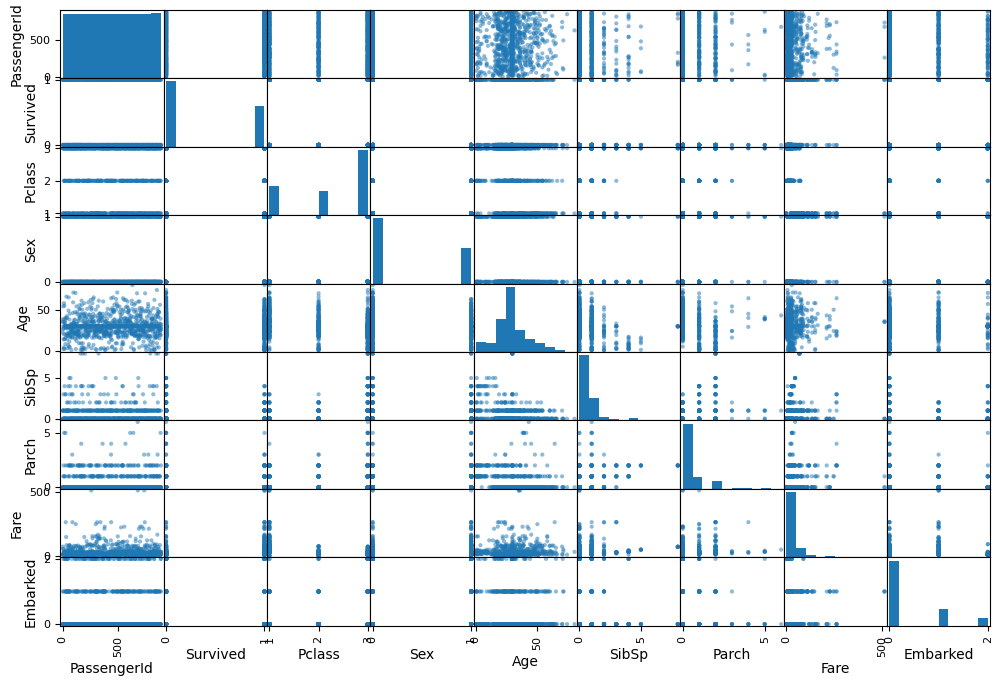

In [9]:
from pandas.plotting import scatter_matrix
 
attribute1= ["PassengerId","Survived", "Pclass","Sex","Age","SibSp","Parch","Fare","Embarked"]
 
scatter_matrix(train_data[attribute1], figsize=(12,8))

In [10]:
# Extracting the 'Survived' column as the target variable y, and dropping 'Name', 'Ticket', 'Survived', and 'Cabin' columns from train_data
y = train_data.Survived.copy()
train_data = train_data.drop(['Name', 'Ticket', 'Survived', 'Cabin'], axis=1)
train_data.head()

# Splitting the train set into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(train_data, y, test_size=0.2, random_state=123)

In [11]:
# Rechecking for missing values in each column of the modified dataframe
train_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [12]:
# Importing machine learning models for classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
# Initializing classifiers
Dt_clf = DecisionTreeClassifier(random_state =123)
Rf_clf = RandomForestClassifier(random_state =123)
LR_clf = LogisticRegression(random_state =123)

In [14]:
# Fitting the classifiers to the training data
Dt_clf.fit(X_train, y_train)
Rf_clf.fit(X_train, y_train)
LR_clf.fit(X_train, y_train)

C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=123)

DT
Accuracy: 0.7263
Precision: 0.7488
Recall: 0.7263
F1 Score: 0.7311

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.71      0.77       114
           1       0.60      0.75      0.67        65

    accuracy                           0.73       179
   macro avg       0.72      0.73      0.72       179
weighted avg       0.75      0.73      0.73       179


Confusion Matrix:
[[81 33]
 [16 49]]
RF
Accuracy: 0.8380
Precision: 0.8375
Recall: 0.8380
F1 Score: 0.8377

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       114
           1       0.78      0.77      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
[[100  14]
 [ 15  50]]
LR
Accuracy: 0.8156
Precision: 0.8136
Recall: 0.8156
F1 Score: 0.8139

Classif

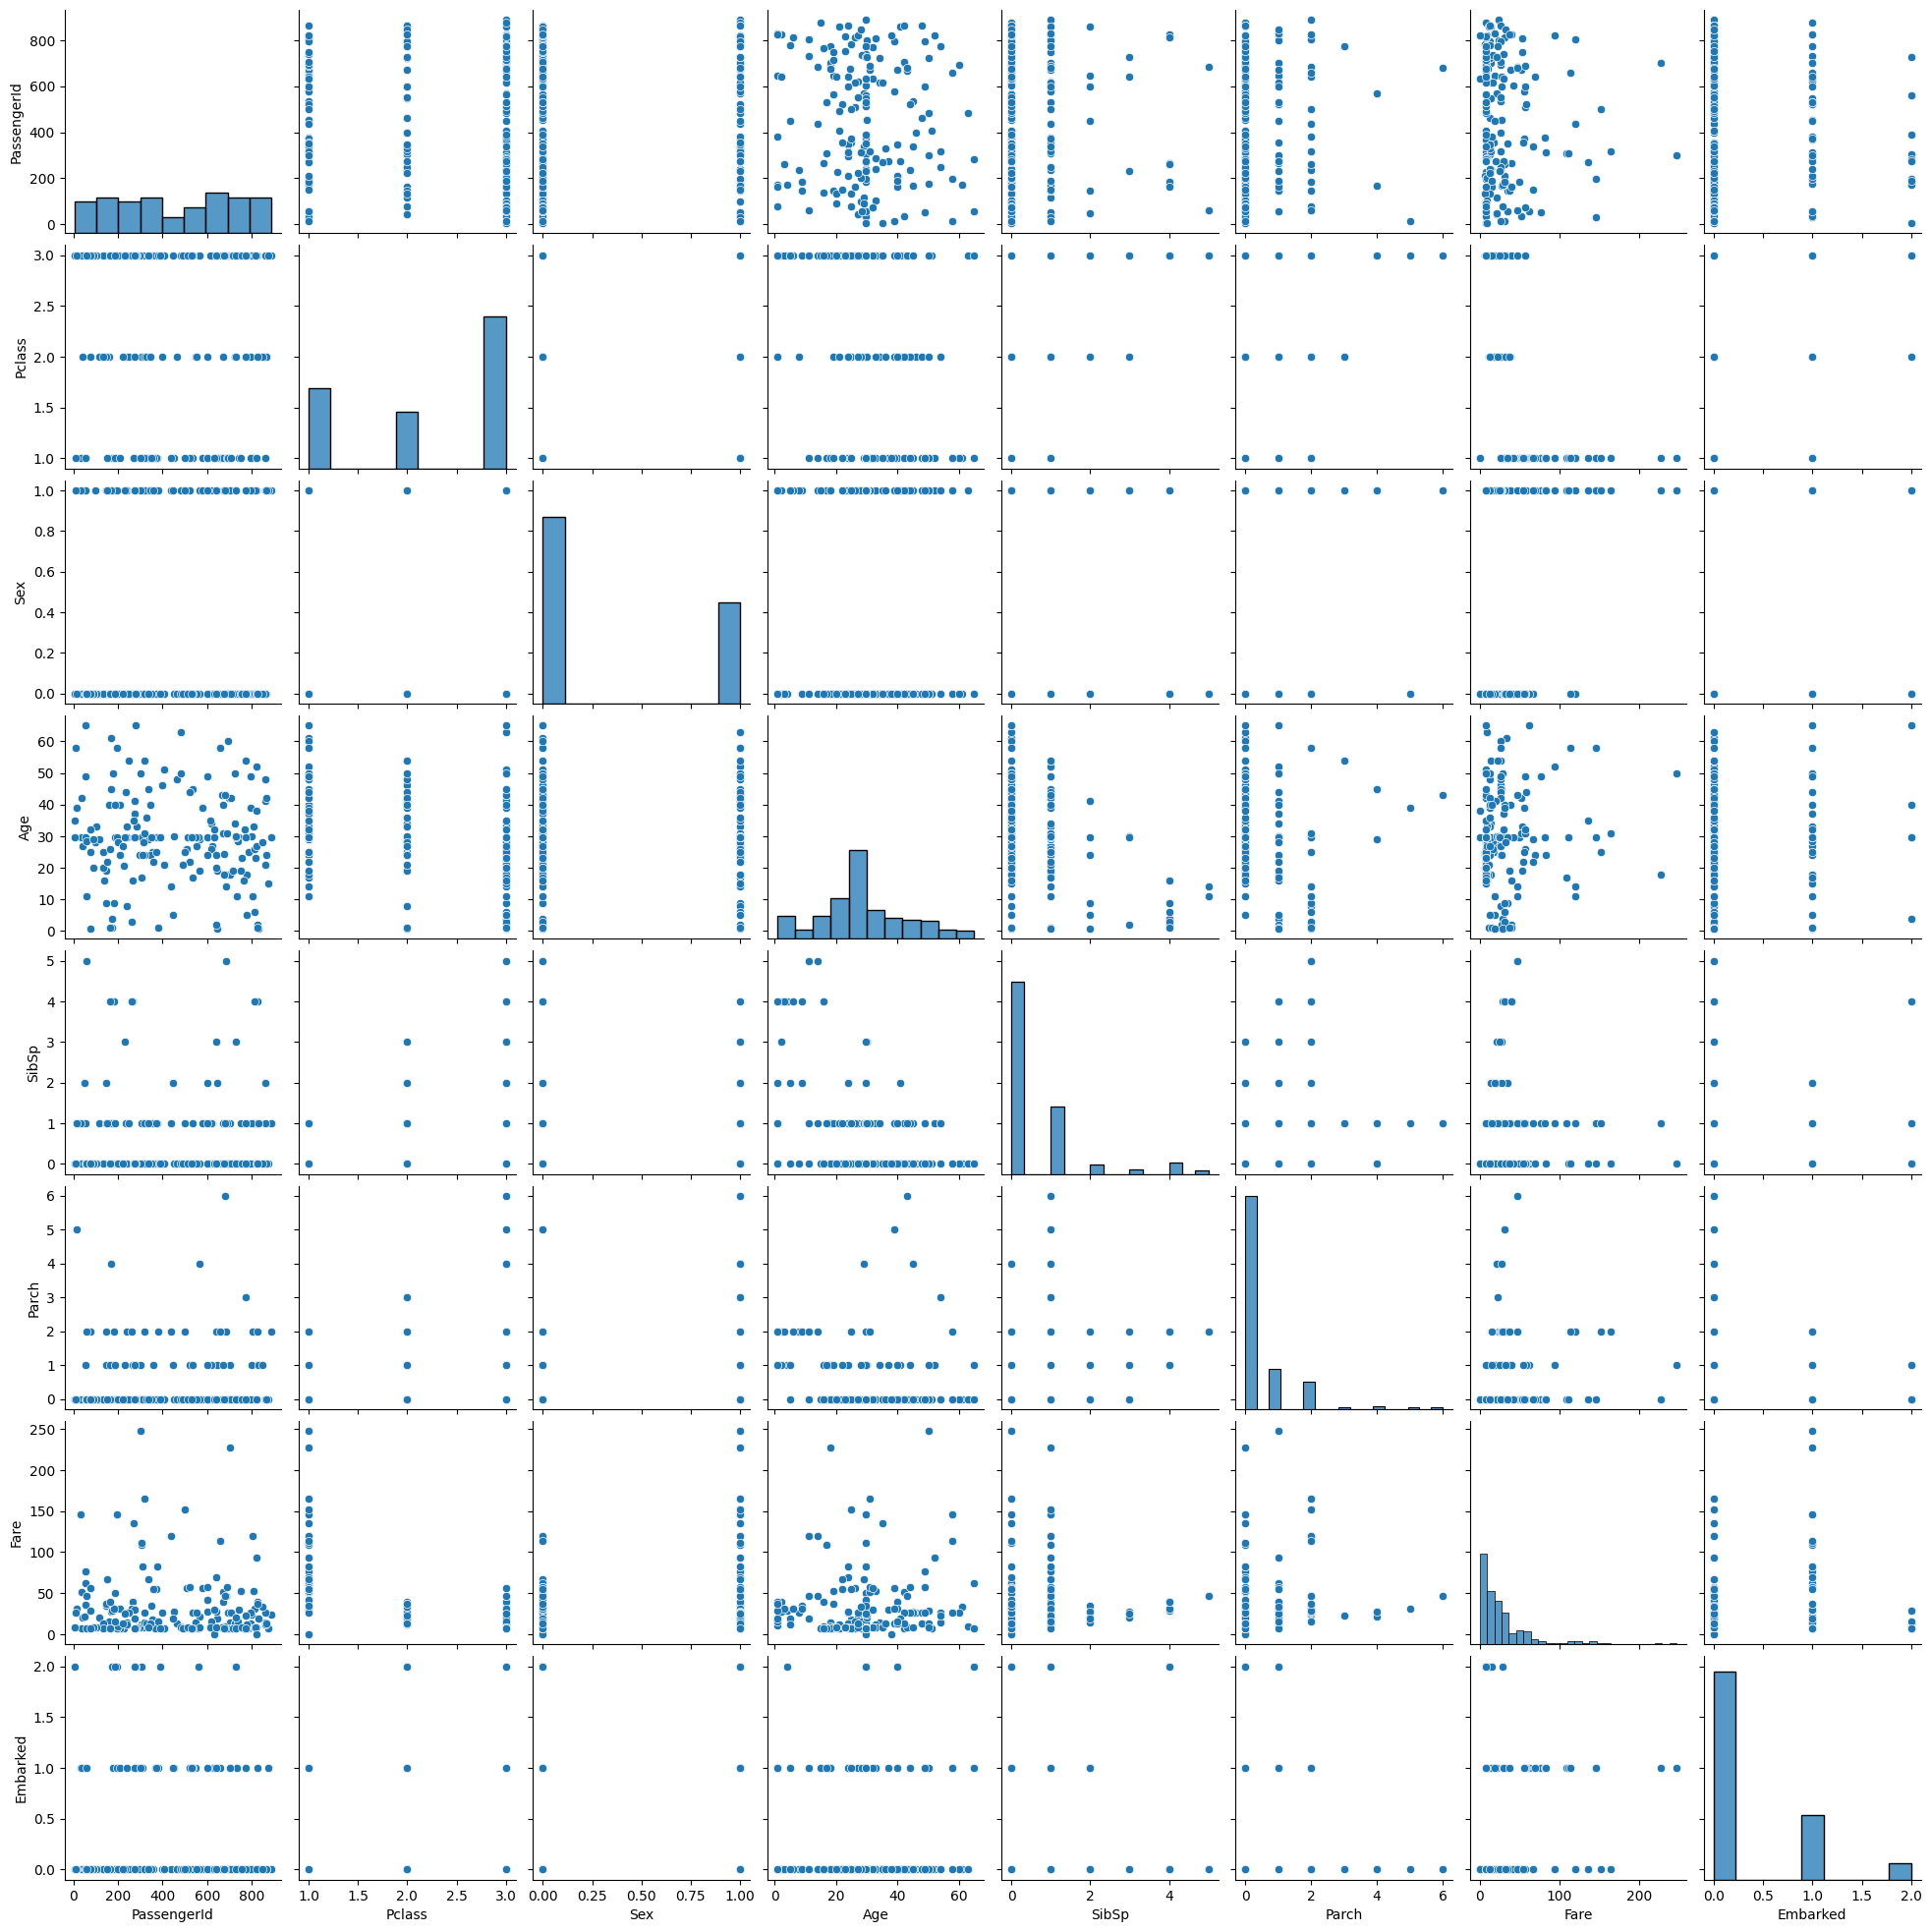

In [15]:
import matplotlib.pyplot as plt  # Importing pyplot for visualization

def evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred))

    # Return accuracy for later use
    return accuracy
    

# Now you can use the evaluate function with your models
print("DT")
DT_accuracy = evaluate(Dt_clf, X_test, y_test)

print("RF")
Rn_accuracy = evaluate(Rf_clf, X_test, y_test)

print("LR") 
LR_accuracy = evaluate(LR_clf, X_test, y_test)

# Now you have the accuracy scores stored in variables for later use
print(f"DT Accuracy: {DT_accuracy:.4f}")
print(f"RF Accuracy: {Rn_accuracy:.4f}")
print(f"LR Accuracy: {LR_accuracy:.4f}")

# Including pyplot for visualization
sns.pairplot(X_test)
plt.show()

In [16]:
# Retrieve the current hyperparameters of the Random Forest classifier
Rf_clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 123,
 'verbose': 0,
 'warm_start': False}

In [17]:
# Define the hyperparameter grid for Random Forest hyperparameter tuning
param_dict1 = {
    'n_estimators': [10, 50, 100, 200],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2'],
    'bootstrap': [True, False]

}

In [18]:
# Importing GridSearchCV for hyperparameter tuning
from sklearn.model_selection import GridSearchCV

In [19]:
# Creating a GridSearchCV object for Random Forest hyperparameter tuning
grid_sc = GridSearchCV(RandomForestClassifier(random_state =123),
                       param_grid = param_dict1,
                       scoring='accuracy',
                       n_jobs=-1,
                       verbose=10)

In [20]:
# Fitting the GridSearchCV object to the training data to search for the best hyperparameters
grid_sc.fit(X_train, y_train)

Fitting 5 folds for each of 1728 candidates, totalling 8640 fits


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
2880 fits failed out of a total of 8640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2702 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklea

GridSearchCV(estimator=RandomForestClassifier(random_state=123), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50, 100, 200]},
             scoring='accuracy', verbose=10)

In [21]:
# Best cross-validation score obtained from grid search
grid_sc.best_score_

0.8356544863587116

In [22]:
# Best parameters found by grid search
grid_sc.best_params_

{'bootstrap': True,
 'criterion': 'entropy',
 'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [23]:
# Best estimator obtained from grid search
grid_sc.best_estimator_

RandomForestClassifier(criterion='entropy', min_samples_leaf=2,
                       min_samples_split=10, n_estimators=200,
                       random_state=123)

Accuracy: 0.8715
Precision: 0.8707
Recall: 0.8715
F1 Score: 0.8708

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       114
           1       0.84      0.80      0.82        65

    accuracy                           0.87       179
   macro avg       0.86      0.86      0.86       179
weighted avg       0.87      0.87      0.87       179


Confusion Matrix:
[[104  10]
 [ 13  52]]
0.8715083798882681


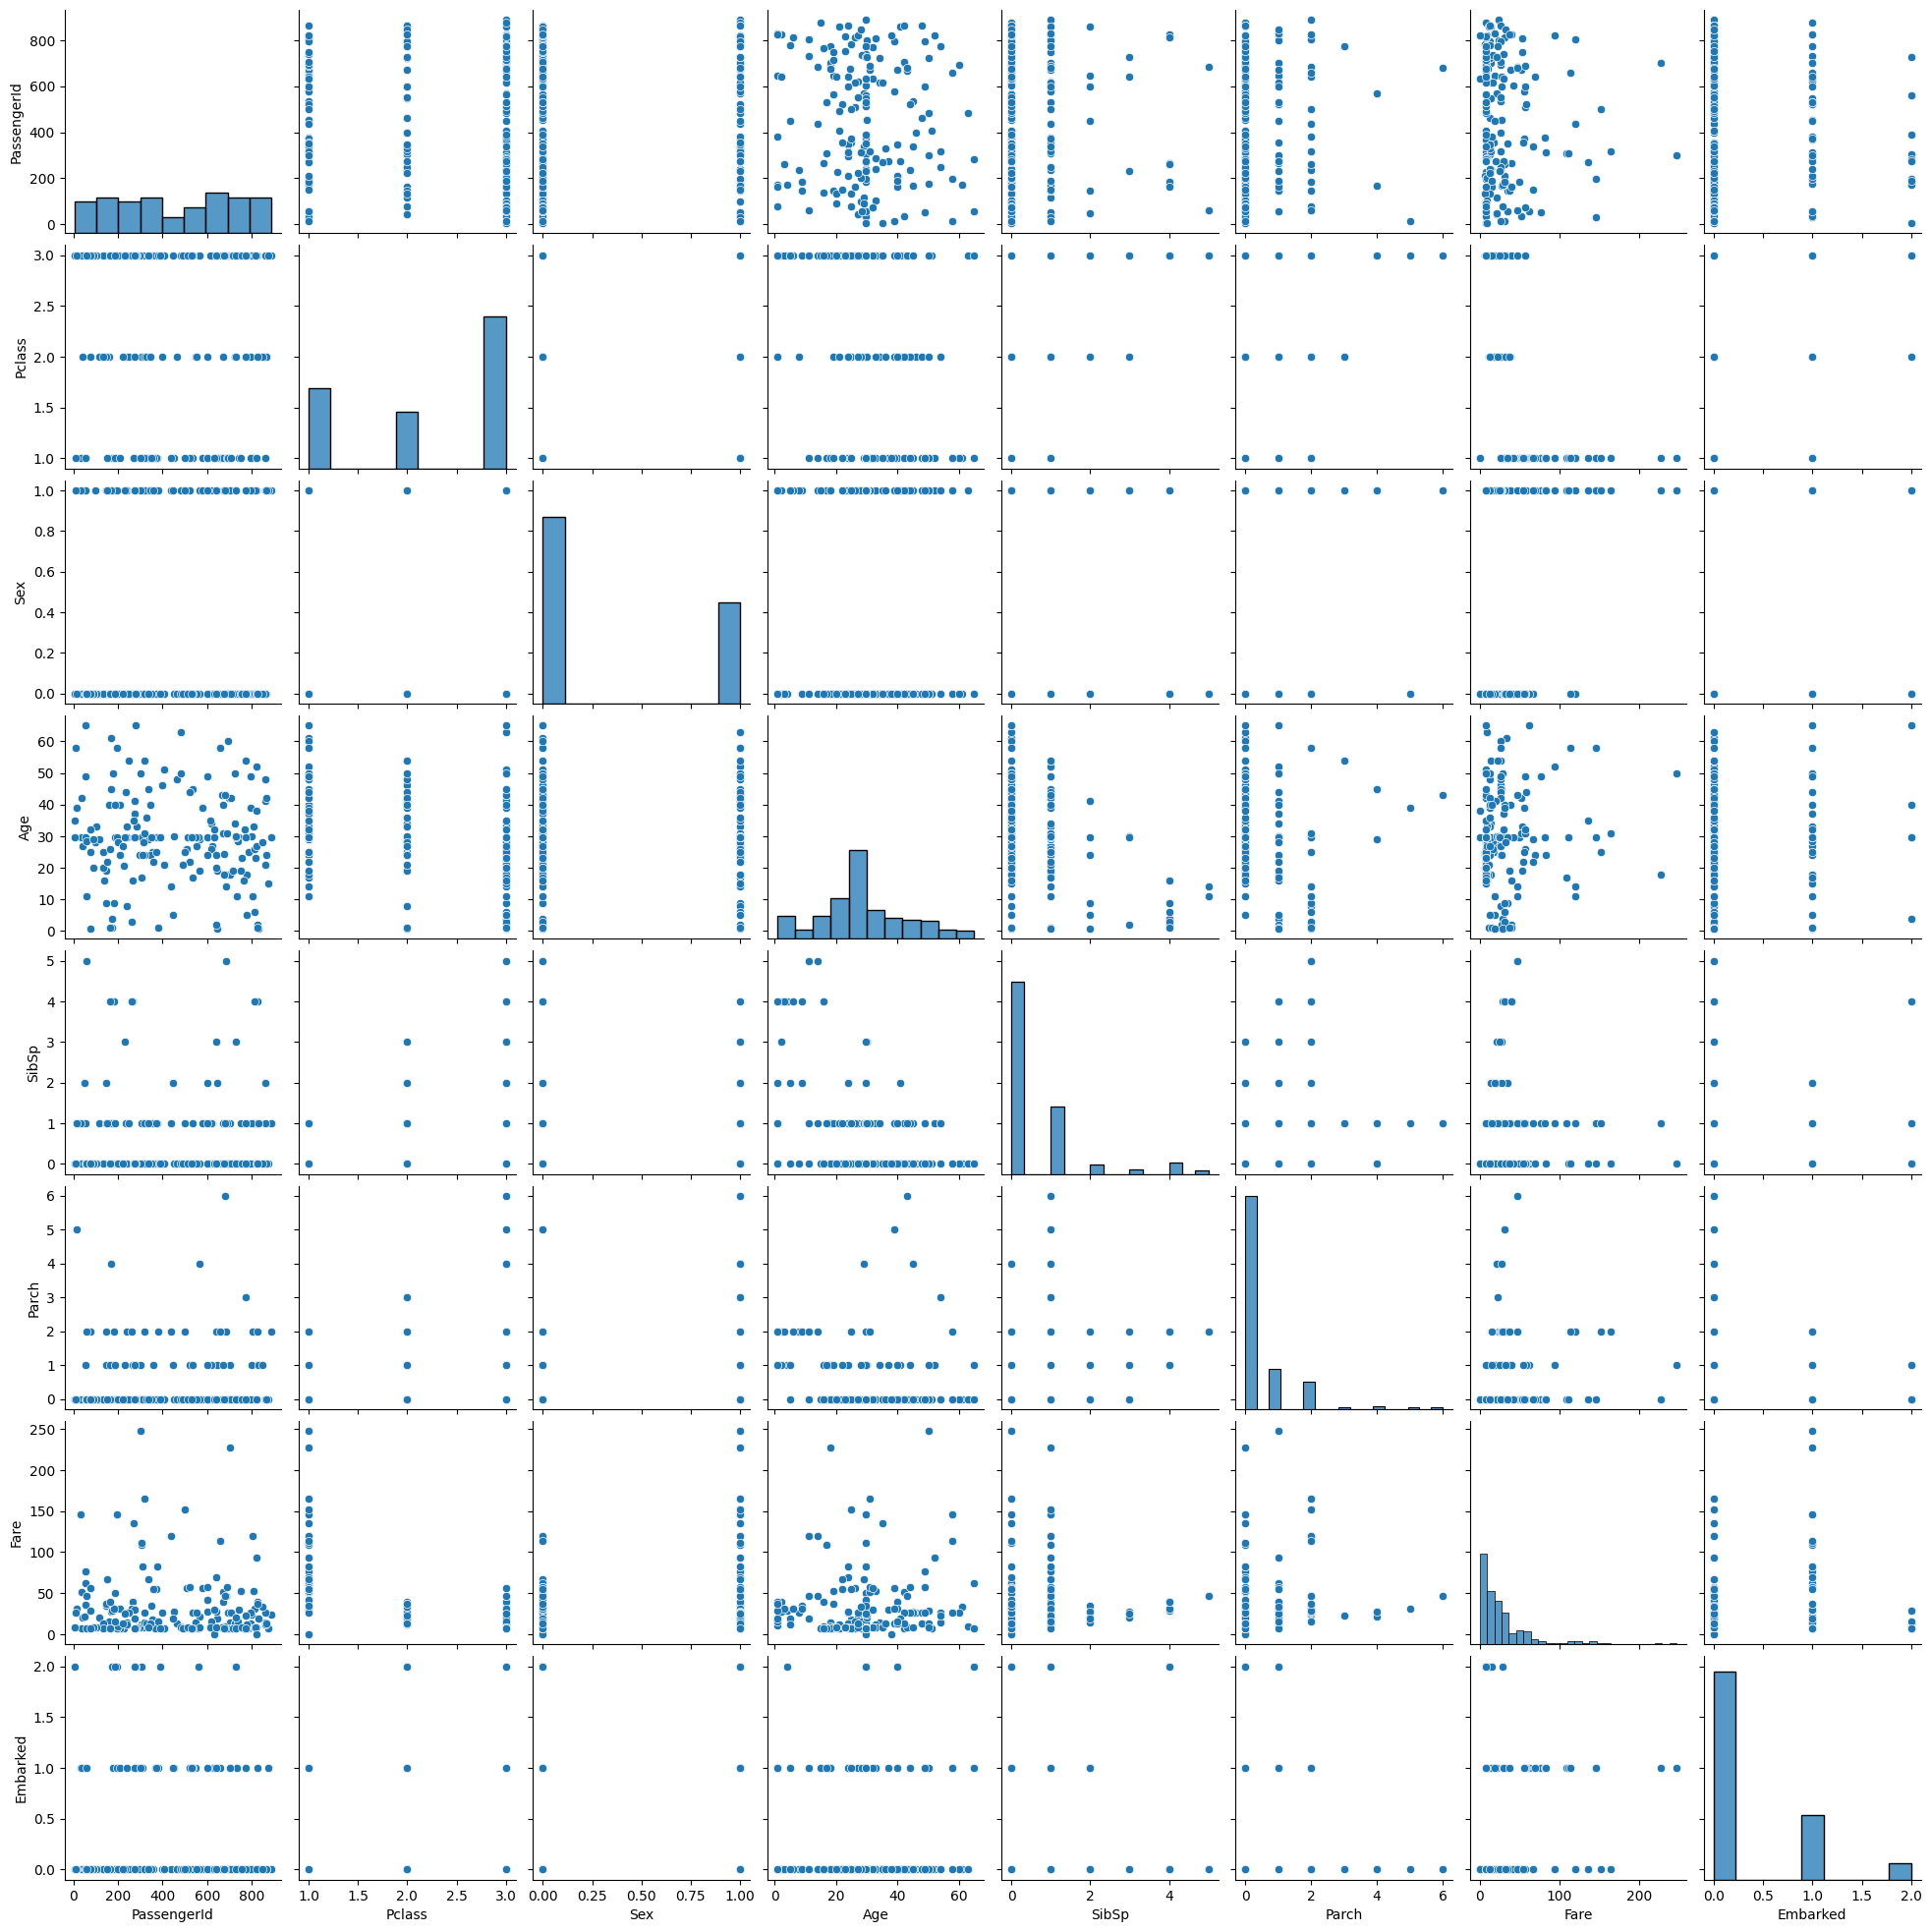

In [24]:
# Storing the best estimator obtained from grid search in Rn_New
Rn_New = grid_sc.best_estimator_

# Evaluating the performance of the new random forest model (Rn_New) on the test data
rn_new_accuracy = evaluate(Rn_New, X_test, y_test)

# Printing the accuracy of the new random forest model
print(rn_new_accuracy)

sns.pairplot(X_test)
plt.show()

In [25]:
# Evaluating the performance of the random forest classifier (Rf_clf) on the test data
evaluate(Rf_clf, X_test, y_test)

Accuracy: 0.8380
Precision: 0.8375
Recall: 0.8380
F1 Score: 0.8377

Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.88      0.87       114
           1       0.78      0.77      0.78        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
[[100  14]
 [ 15  50]]


0.8379888268156425

In [26]:
# Retrieving the parameters of the decision tree classifier (Dt_clf)
Dt_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 123,
 'splitter': 'best'}

In [27]:
# Dictionary containing the parameter grid for decision tree hyperparameter tuning
param_dict = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

In [28]:
from sklearn.model_selection import GridSearchCV

# Grid search object for hyperparameter tuning using decision tree classifier
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=123),
                          param_grid=param_dict,
                          scoring='accuracy',
                          n_jobs=-1,
                          verbose=10
                          )

In [29]:
# Fitting the grid search to find the best hyperparameters using training data
grid_search.fit(X_train, y_train)


Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(estimator=DecisionTreeClassifier(random_state=123), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy', verbose=10)

Accuracy: 0.7933
Precision: 0.7940
Recall: 0.7933
F1 Score: 0.7936

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.83      0.84       114
           1       0.71      0.72      0.72        65

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179


Confusion Matrix:
[[95 19]
 [18 47]]
0.7932960893854749


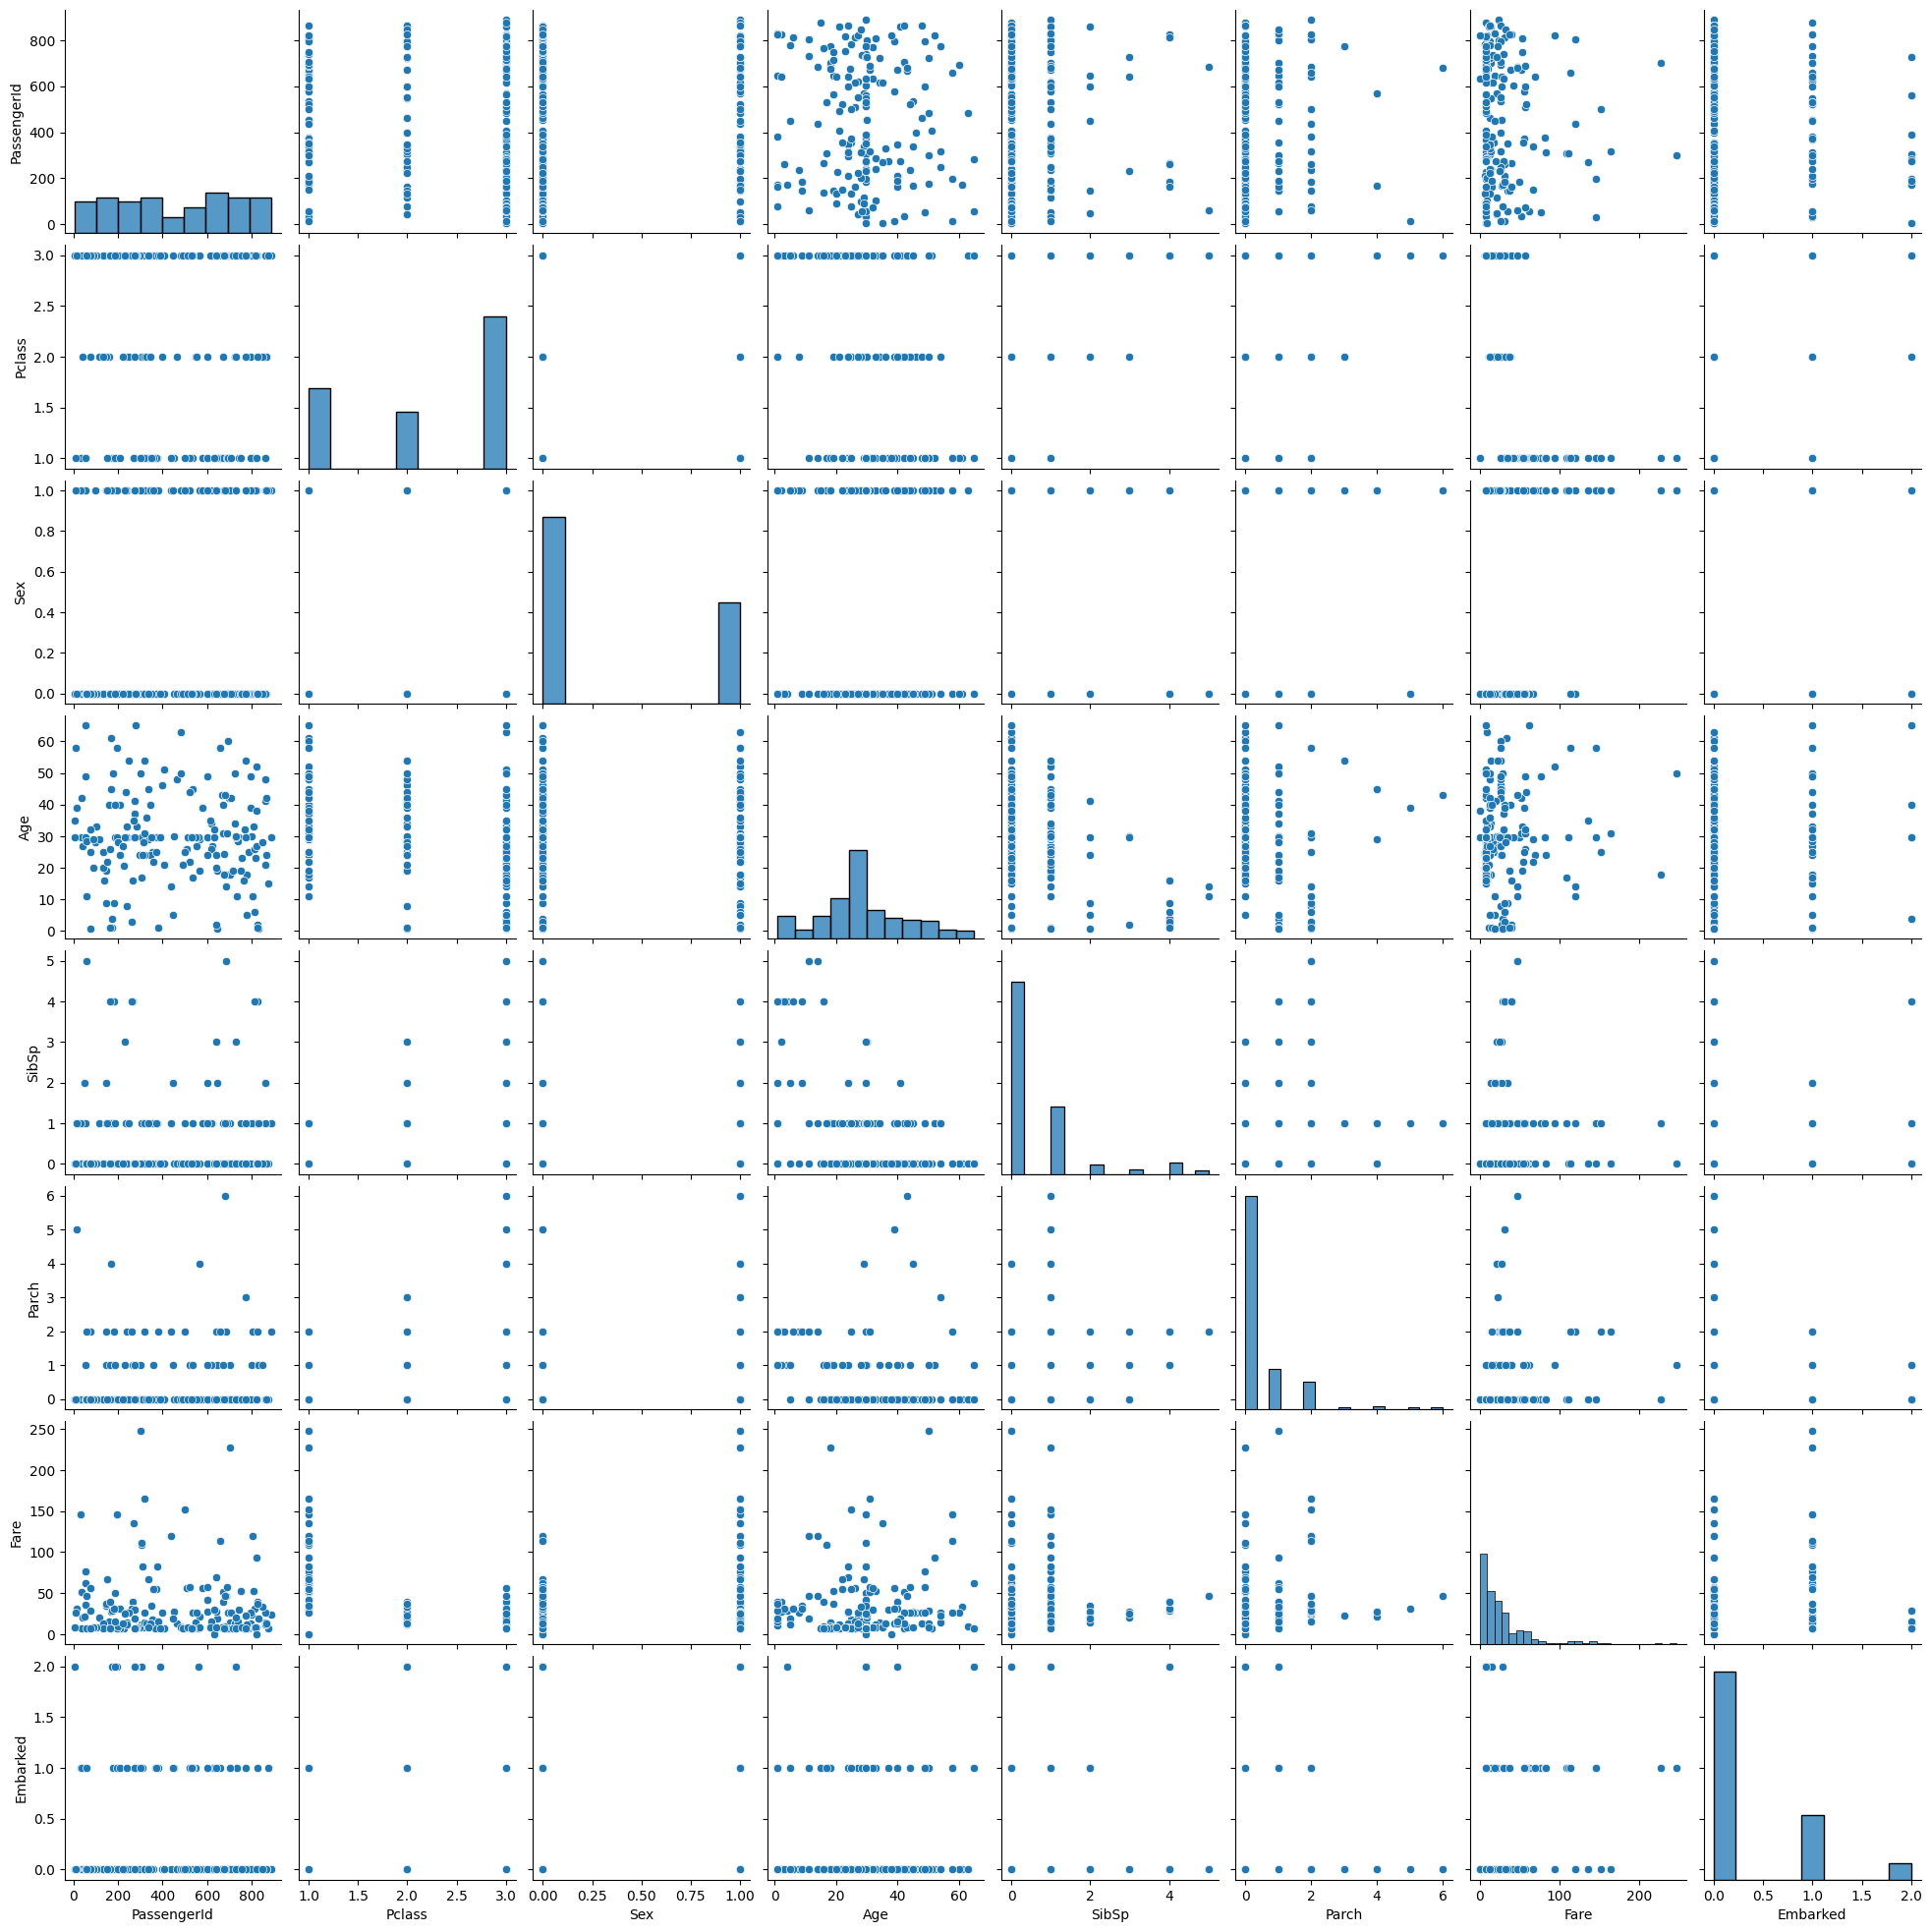

In [30]:
# Storing the best estimator obtained from grid search in Rn_New
Dt_New = grid_search.best_estimator_

# Evaluating the performance of the new random forest model (Rn_New) on the test data
dt_new_accuracy = evaluate(Dt_New, X_test, y_test)

# Printing the accuracy of the new random forest model
print(dt_new_accuracy)

sns.pairplot(X_test)
plt.show()

In [31]:
LR_clf.get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': 123,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [32]:
param_dict9 = {
      'penalty': ['l1','l2'],
        'C': [0.001,0.01,0.1,1,10,100],
        'fit_intercept': [True, False],
        'solver': ['liblinear','lbfgs','newton-cg','sag','saga']
}

param_dict9

{'penalty': ['l1', 'l2'],
 'C': [0.001, 0.01, 0.1, 1, 10, 100],
 'fit_intercept': [True, False],
 'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag', 'saga']}

In [33]:
#Logistic Regression
from sklearn.model_selection import GridSearchCV
grid_search1 = GridSearchCV(LogisticRegression(random_state=123),
                          param_grid = param_dict9,
                          scoring='accuracy',
                          n_jobs=-1,
                          verbose=10
                          )

In [34]:
grid_search1.fit(X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits


C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
180 fits failed out of a total of 600.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Sandun\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\Sandun\

GridSearchCV(estimator=LogisticRegression(random_state=123), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': [True, False],
                         'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'lbfgs', 'newton-cg', 'sag',
                                    'saga']},
             scoring='accuracy', verbose=10)

In [35]:
grid_search1.best_score_

0.8048261597557372

In [36]:
grid_search1.best_params_

{'C': 0.1, 'fit_intercept': True, 'penalty': 'l2', 'solver': 'newton-cg'}

In [37]:
grid_search1.best_estimator_

LogisticRegression(C=0.1, random_state=123, solver='newton-cg')

In [38]:
LR_new = grid_search1.best_estimator_

In [39]:
LR_new_accuracy = evaluate(LR_new, X_test, y_test)

Accuracy: 0.8380
Precision: 0.8368
Recall: 0.8380
F1 Score: 0.8371

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       114
           1       0.79      0.75      0.77        65

    accuracy                           0.84       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.84      0.84      0.84       179


Confusion Matrix:
[[101  13]
 [ 16  49]]


In [40]:
evaluate(LR_clf, X_test, y_test)

Accuracy: 0.8156
Precision: 0.8136
Recall: 0.8156
F1 Score: 0.8139

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.88      0.86       114
           1       0.77      0.71      0.74        65

    accuracy                           0.82       179
   macro avg       0.80      0.79      0.80       179
weighted avg       0.81      0.82      0.81       179


Confusion Matrix:
[[100  14]
 [ 19  46]]


0.8156424581005587

In [41]:
val_predictions1 = Rn_New.predict(X_test)
# Calculating the mean squared error between the true labels and the predictions
mse = mean_squared_error(y_test, val_predictions1)

# Printing the mean squared error
print(f"Mean Squared Error (MSE): {mse:.4f}")

Mean Squared Error (MSE): 0.1285


In [42]:
# Calculating the mean squared error between the true labels and the predictions
#mse = mean_squared_error(y_test, val_predictions)

# Printing the mean squared error
#print(f"Mean Squared Error (MSE): {mse:.4f}")

In [43]:
# Reading the test data from "test.csv" file into a DataFrame called test_data and displaying the first few rows
test_data = pd.read_csv("test.csv")
print(test_data.head())

# Displaying the data types of each column in the test_data DataFrame
print(test_data.dtypes)

   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
0  34.5      0      0   330911   7.8292   NaN        Q  
1  47.0      1      0   363272   7.0000   NaN        S  
2  62.0      0      0   240276   9.6875   NaN        Q  
3  27.0      0      0   315154   8.6625   NaN        S  
4  22.0      1      1  3101298  12.2875   NaN        S  
PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          

In [44]:
# Dropping 'Name', 'Ticket', and 'Cabin' columns from the test_data DataFrame
test_data = test_data.drop(['Name', 'Ticket', 'Cabin'], axis=1)

# Replacing categorical values in 'Sex' and 'Embarked' columns with numerical equivalents
test_data.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

# Filling null values in the 'Age', 'Fare', and 'Embarked' columns with appropriate values
test_data['Age'].fillna(test_data['Age'].mean(), inplace=True)
test_data['Fare'].fillna(test_data['Fare'].mean(), inplace=True)
test_data['Embarked'].fillna(test_data['Embarked'].mode()[0], inplace=True)

# Displaying the data types of each column in the test_data DataFrame
print(test_data.dtypes)

PassengerId      int64
Pclass           int64
Sex              int64
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int64
dtype: object


In [45]:
# Checking for missing values in the test_data DataFrame
test_data.isnull().sum()

PassengerId    0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [46]:
# Extracting the PassengerId column from the test_data DataFrame
test_passenger_ids = test_data["PassengerId"]

In [53]:
# Predictions on the test set
test_predictions = Rn_New.predict(test_data)

# Creating a submission DataFrame
submission_df = pd.DataFrame({
    "PassengerId": test_passenger_ids,
    "Survived": test_predictions
})

# Displaying the first 10 rows of the submission DataFrame
submission_df.head(5)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [48]:
# Saving the submission DataFrame to a CSV file named "Advanced_model_results.csv" without including the index
submission_df.to_csv("Advanced_model_results.csv", index=False)

# Printing a message to indicate that the submission file has been saved successfully
print("Submission file saved successfully.")

Submission file saved successfully.


In [49]:
# create pikel file
import pickle

pickle.dump(Rn_New, open('./model.h5', 'wb'))